In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

In [2]:
def feature_normalize(X):
    X_mean = np.sum(X) / len(X)
    X_var = np.std(X)
    X_norm = (X - X_mean) / X_var
    
    return X_norm

In [3]:
def do_normalize(X):
    for i in range(len(X)):
        if i == 0:
            continue
        X[i] = feature_normalize(X[i])

    return X

In [4]:
def vector_data(data):
    global X_Original
    
    # Vector Feature
    feature_0 = np.ones(len(data))
    feature_1 = data[:,0].reshape((1,len(data)))
    feature_2 = data[:,1].reshape((1,len(data)))
    X = np.vstack((feature_0, feature_1, feature_2))

    X_Original = X.copy()
    
    # Normalize Feature
    X = do_normalize(X)

    # Vector Targer
    Y = data[:,2].reshape((len(data), 1))

    return X, Y

In [5]:
def Cost_Function_Error(X, Y, theta):
    totalError = 0
    
    hyp = np.dot(theta.T, X)
    error = (hyp - Y.T) ** 2
    # Sample set need sum each error in every sample point
    totalError = np.sum(error) / (2 * len(X.T))

    return totalError

In [6]:
def Gradient_Descent_Update_Theta(X, Y, theta, lr):
    theta_0 = theta_1 = theta_2 = 0

    hyp = np.dot(theta.T, X)
    error_mean = (hyp - Y.T) / len(X.T)
    diff = np.dot(X, error_mean.T)
    theta_0, theta_1, theta_2 = theta - lr * diff

    return theta_0, theta_1, theta_2

In [7]:
def optimizer(X, Y, theta, lr, iterNum, maxError):
    global err_history
    last_error = 0.0
    last_theta = np.array([[0], [0], [0]])
    
    for i in range(iterNum):
        theta[0], theta[1], theta[2]= Gradient_Descent_Update_Theta(X, Y, theta, lr)
        error = Cost_Function_Error(X, Y, theta)
        err_history[i] = error
        if log_err_open:
            print("<Iter {0}> <Theta {1},{2},{3}> <Error {4}>".format(i, theta[0], theta[1], theta[2], error))
        if err_compare_open:
            if np.linalg.norm(theta.T - last_theta.T) < min_theta:
                print("[Finsih - err_compare_open] <Iter {0}> <Theta {1},{2},{3}> <Error {4}>".format(i, theta[0], theta[1], theta[2], error))
                return theta
            if abs(last_error - error) < maxError:
                print("[Finsih - maxError] <Iter {0}> <Theta {1},{2},{3}> <Error {4}>".format(i, theta[0], theta[1], theta[2], error))
                return theta
            else:
                last_error = error
            if i > max_iter:
                print("[Finsih - max_iter] <Iter {0}> <Theta {1},{2},{3}> <Error {4}>".format(i, theta[0], theta[1], theta[2], error))
                return theta
            
    return theta

In [8]:
def plot_cost_function_iter(time, ax):
    ax.plot(range(time), err_history[:time], '-')

In [30]:
def plot_feature_Normalize(X, Y, theta_0, theta_1, theta_2):
    M = Y.size
    
    fig = plt.figure(figsize=(80, 60))
    ax = plt.subplot(221, projection='3d') 
    ax.tick_params(labelsize=50)
    ax.scatter(X[1].reshape(-1), X[2].reshape(-1),Y.reshape(-1),linewidths=30,marker='s')
    theta = np.array([[theta_0], [theta_1], [theta_2]])
    hyp = np.dot(theta.T, X)
    print(hyp)
    print(Y)
    ax.scatter(X[1].reshape(-1), X[2].reshape(-1),hyp,linewidths=30,marker='s', c='r')
    
    ax = plt.subplot(222, projection='3d')
    ax.tick_params(labelsize=50)
    ax.scatter(X_Original[1].reshape(-1), X_Original[2].reshape(-1),Y.reshape(-1),linewidths=30,marker='s')

In [31]:
def plot_data(X, Y, theta_0, theta_1, theta_2):
    plot_feature_Normalize(X, Y, theta_0, theta_1, theta_2)
    
    fig = plt.figure(figsize=(20,15))
    ax = plt.subplot(221) 
    plot_cost_function_iter(iter_1, ax)
    ax = plt.subplot(222) 
    plot_cost_function_iter(iter_2, ax)

In [32]:
def linear_regression_vecter():
    data = np.loadtxt(file_name, delimiter=',')
    
    theta = np.array([[0.0], [0.0], [0.0]])
    X, Y = vector_data(data)
    
    print('Intital Variables:\n theta[0] = {0}\n theta[1] = {1}\n theta[2] = {2}\n error = {3}\n'.format(
        theta[0], theta[1], theta[2], Cost_Function_Error(X, Y, theta)))
    [theta_0, theta_1, theta_2] = optimizer(X, Y, theta, lr, iterNum, maxError)
    print('End Variables:\n theta[0] = {0}\n theta[1] = {1}\n theta[2] = {2}\n error = {3}\n'.format(
        theta_0, theta_1, theta_2, Cost_Function_Error(X, Y, theta)))
    
    plot_data(X, Y, theta_0, theta_1, theta_2)

In [33]:
def main():
    linear_regression_vecter()

Intital Variables:
 theta[0] = [0.]
 theta[1] = [0.]
 theta[2] = [0.]
 error = 65591548106.45744

[Finsih - maxError] <Iter 95> <Theta [340412.65957447],[109447.72386792],[-6578.28225244]> <Error 2043280050.6051483>
End Variables:
 theta[0] = [340412.65957447]
 theta[1] = [109447.72386792]
 theta[2] = [-6578.28225244]
 error = 2043280050.6051483

[[[356283.08438314 286120.95122004 397489.4165583  269244.1268678
   472277.84288643 330979.10248851 276933.05282963 262037.52059064
   255494.62325202 271364.62956272 324714.62631323 341805.18388917
   326492.01990516 669293.1599233  239903.03810466 374830.43571545
   255879.91102721 235448.29949113 417846.50545236 476593.37091829
   309369.1183594  334951.52141738 286677.79354673 327777.25911004
   604913.18325081 216515.66038363 266353.0486225  415029.94984908
   369647.30022373 430482.32441476 328130.20291541 220070.44756747
   338635.68448052 500087.61525117 306756.46127744 263429.62640737
   235865.93123615 351443.05799442 641418.6996189

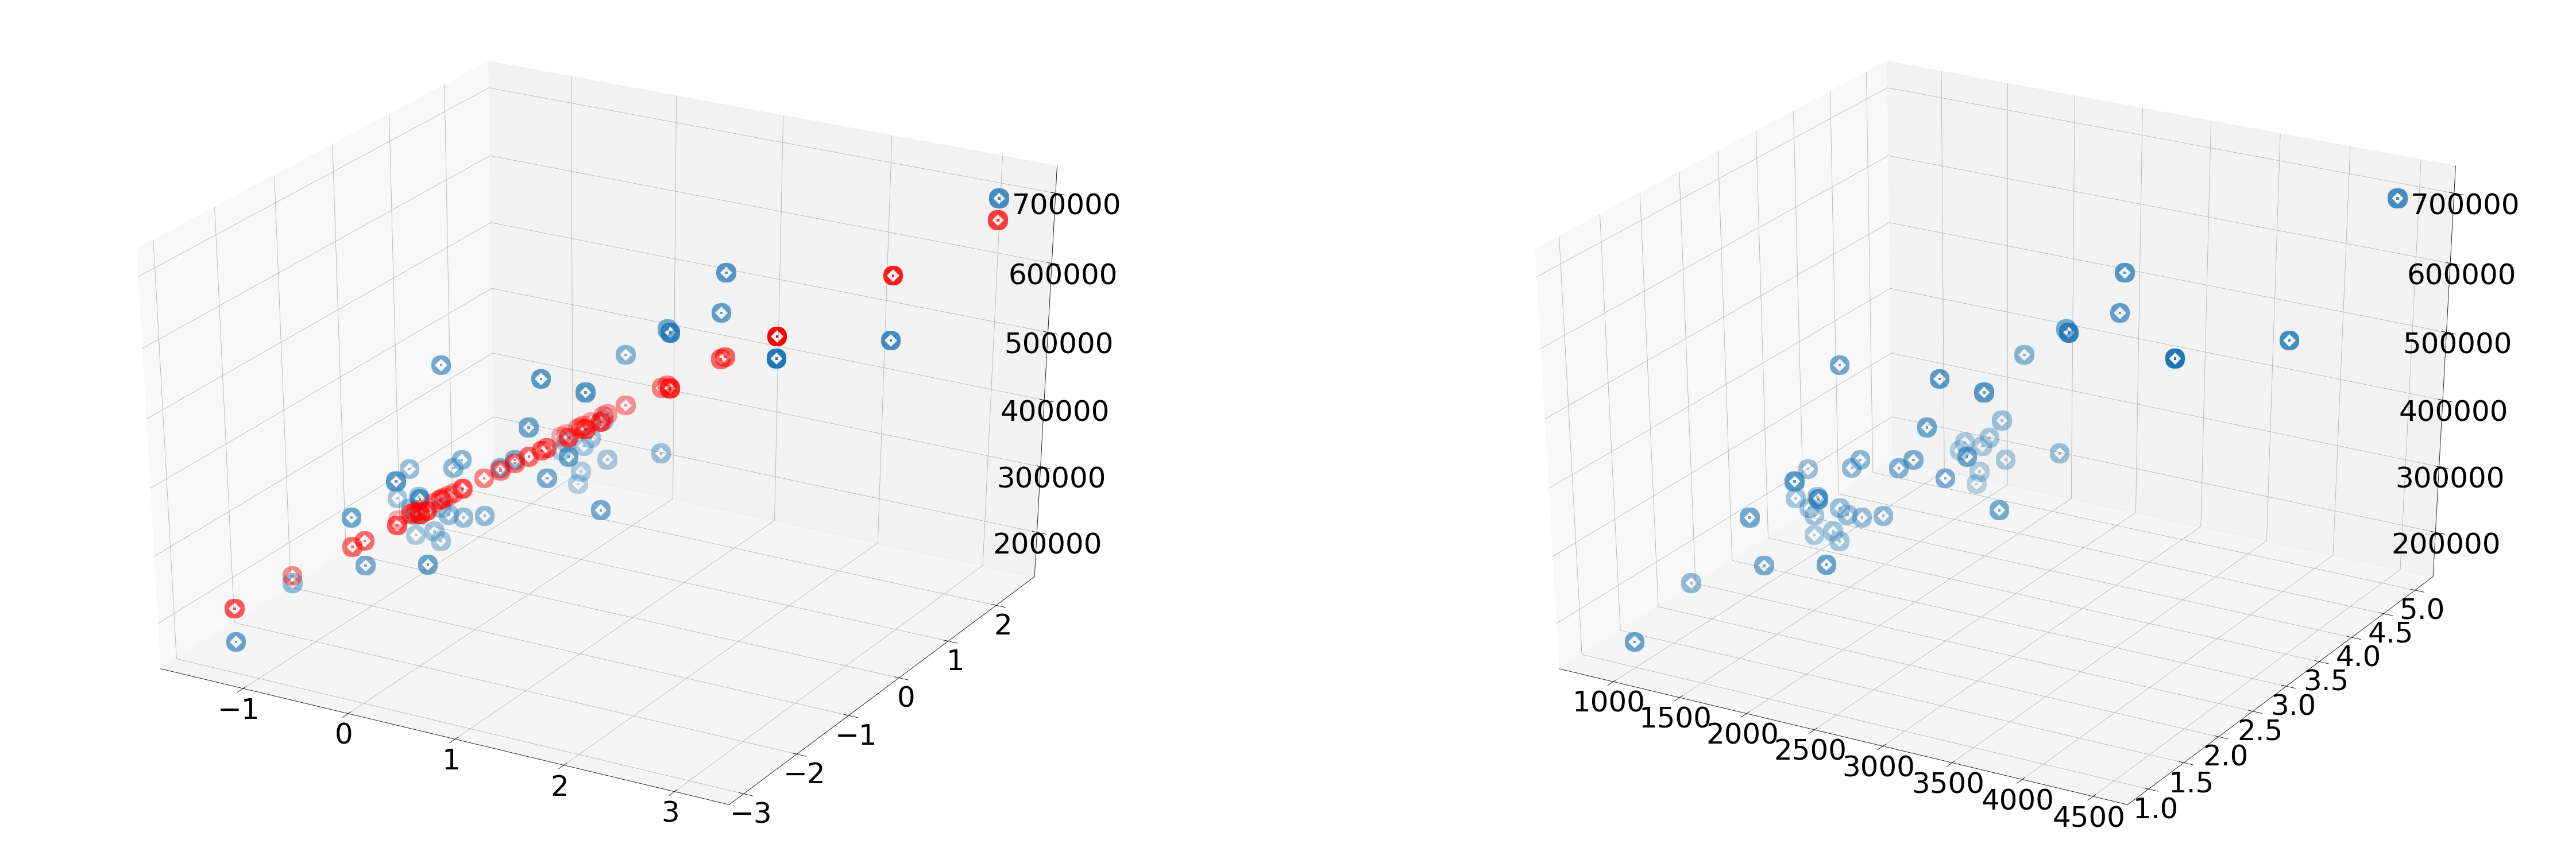

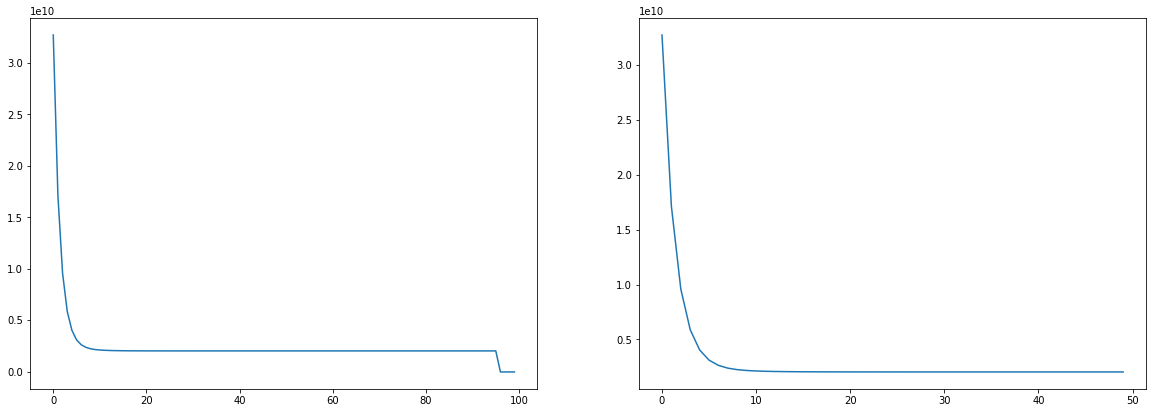

In [34]:
# Golbal Value
file_name = 'ex1data2.csv'
lr = 0.3
iterNum = 40000
maxError = 1e-3
max_iter = 4000
X_Original = {}
err_history = np.zeros(iterNum)
log_err_open = False
err_compare_open = True
min_theta = 1e-4
iter_1 = 100
iter_2 = 50

main()